## 7. Data analysis

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

In [95]:
import pandas as pd
anime_list_df = pd.read_csv('AnimeList.csv')
anime_list_df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


##### Now since we want to use this model to predict the rating of future/upcoming anime, we should not include data that is not available before release. Other then that we will also exclude other irrelevant data

In [96]:
#Notes for some of them. Background has 93% missing values, so it will be removed. Broadcast has 71% missing values, so that will be removed. Related is the same as source, just with a link to the related source.
#Now there is a column called premiered, from following anime for some time, we know that the season of a anime release might be important. The year wont be taken that much in consideration.
#But there is 72% missing values, to try and fill it up,  we are keeping in aired_string and aired, to try and fill it up, since they include start date. 
##dropping japanese title, dont understand them, plus title is just that directly translated.
df_simple_removel = anime_list_df.drop(['image_url', 'status', 'airing', 'scored_by', 'rank', 'popularity', 'members',
                                        'favorites', 'background', 'related', 'title_japanese', 'broadcast'], axis=1)
df_simple_removel

,anime_id,title,title_english,title_synonyms,type,source,episodes,aired_string,aired,duration,rating,score,premiered,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,Youko x Boku SS,TV,Manga,12,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,Winter 2012,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,The Inland Sea Bride,TV,Manga,26,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,Spring 2007,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,"Shugo Chara Ninenme, Shugo Chara! Second Year",TV,Manga,51,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,Fall 2008,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,NaN,TV,Original,38,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,Summer 2002,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,Bakuman Season 3,TV,Manga,25,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,Fall 2012,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,NaN,TV,Unknown,5,"Nov 5, 1987 to Nov 4, 1988","{'from': '1987-11-05', 'to': '1988-11-04'}",8 min. per ep.,G - All Ages,5.50,Fall 1987,NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,NaN,OVA,Unknown,1,"Mar 21, 1986","{'from': '1986-03-21', 'to': '1986-03-21'}",25 min.,G - All Ages,4.60,NaN,Studio Lotus,NaN,NaN,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,NaN,"Godzilla Part 3, Godzilla: Eater of Stars",Movie,Other,1,"Nov, 2018","{'from': None, 'to': None}",Unknown,R - 17+ (violence & profanity),0.00,NaN,NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,NaN,OVA,Other,1,Not available,"{'from': None, 'to': None}",40 min.,G - All Ages,6.00,NaN,NaN,NaN,NaN,"Fantasy, Kids",[],[]


Now i want to fix the issue with missing season release. I want to fill in as many missing values as possible with the seasons Winter, Spring, Summer, Fall.

In [97]:
month_to_season = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Fall',
    'Oct': 'Fall',
    'Nov': 'Fall',
    'Dec': 'Winter'
}

month_to_season_num = {
    '1': 'Winter',
    '2': 'Winter',
    '3': 'Spring',
    '4': 'Spring',
    '5': 'Spring',
    '6': 'Summer',
    '7': 'Summer',
    '8': 'Summer',
    '9': 'Fall',
    '10': 'Fall',
    '11': 'Fall',
    '12': 'Winter'
}

In [98]:
import numpy as np
import re

seasonal_columns = df_simple_removel[['aired', 'aired_string', 'premiered']]
seasonal_columns['release_season'] = np.nan

unknown_months = []
unknown_values = []

for index, row in seasonal_columns.iterrows():
    premiered = row['premiered']
    if not pd.isna(premiered):
        seasonal_columns.loc[index, 'release_season'] = premiered.split(' ')[0]
        next
    aired_string = row['aired_string']
    if not pd.isna(aired_string):
        month = re.split(r' |,', aired_string)[0]
        season = month_to_season.get(month)
        if season is None:
            unknown_months.append(aired_string) #just for debugging purposes
        else:
            seasonal_columns.loc[index, 'release_season'] = season
            next
    aired = row['aired']
    from_data = aired.split(',')[0]
    month = from_data.split('-')[0]
    if month.isnumeric():
        season = month_to_season_num.get(month)
        if season is None:
            unknown_values.append(aired)
            next
        seasonal_columns.loc[index, 'release_season'] = season
        

seasonal_columns

C:\Users\simso\AppData\Local\Temp\ipykernel_7264\2244153821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_columns['release_season'] = np.nan


,aired,aired_string,premiered,release_season
0,"{'from': '2012-01-13', 'to': '2012-03-30'}","Jan 13, 2012 to Mar 30, 2012",Winter 2012,Winter
1,"{'from': '2007-04-02', 'to': '2007-10-01'}","Apr 2, 2007 to Oct 1, 2007",Spring 2007,Spring
2,"{'from': '2008-10-04', 'to': '2009-09-25'}","Oct 4, 2008 to Sep 25, 2009",Fall 2008,Fall
3,"{'from': '2002-08-16', 'to': '2003-05-23'}","Aug 16, 2002 to May 23, 2003",Summer 2002,Summer
4,"{'from': '2012-10-06', 'to': '2013-03-30'}","Oct 6, 2012 to Mar 30, 2013",Fall 2012,Fall
...,...,...,...,...
14473,"{'from': '1987-11-05', 'to': '1988-11-04'}","Nov 5, 1987 to Nov 4, 1988",Fall 1987,Fall
14474,"{'from': '1986-03-21', 'to': '1986-03-21'}","Mar 21, 1986",NaN,Spring
14475,"{'from': None, 'to': None}","Nov, 2018",NaN,Fall
14476,"{'from': None, 'to': None}",Not available,NaN,NaN


Adding the release season back to the dataset, and removing aired, aired_string, and premiered columns.

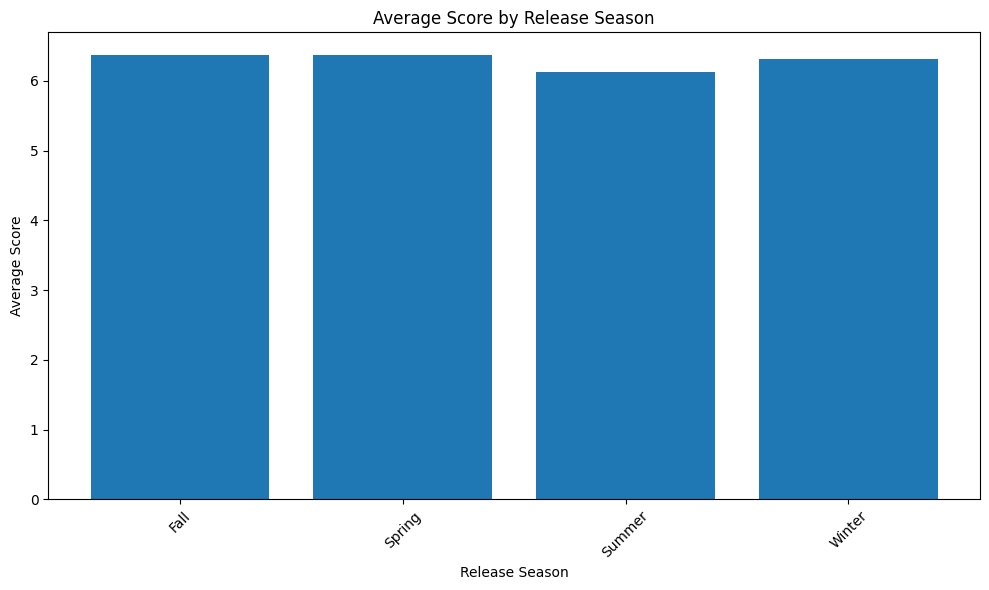

In [99]:
import matplotlib.pyplot as plt

df_with_season = pd.concat([df_simple_removel, seasonal_columns['release_season']], axis=1)
df_with_season.drop(['aired', 'aired_string', 'premiered'], axis=1, inplace=True)

avg_scores_by_season = df_with_season.groupby('release_season')['score'].mean()

plt.figure(figsize=(10, 6))  
plt.bar(avg_scores_by_season.index, avg_scores_by_season.values)
plt.xlabel('Release Season')
plt.ylabel('Average Score')
plt.title('Average Score by Release Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now, in the anime community, some people think long names will tell you its a bad anime, but production teams chooses long names for marketing. It could be interesting to see if name length has any correlation with rating.

In [100]:
# for this I'm gonna take only title since i dont understand japanese symbols, and there is alot of null values for the english titles.
tittle_df = df_with_season[['title', 'score']]
tittle_df = tittle_df.dropna()
tittle_df['title'] = tittle_df['title'].apply(lambda x: len(x) if isinstance(x, str) else x)
mean = tittle_df['title'].mean()
lower = tittle_df[tittle_df['title'] < mean]
higher = tittle_df[tittle_df['title'] >= mean]
avg_lower = lower['score'].mean()
avg_higher = higher['score'].mean()
print(f'Average score for lower than median title length: {avg_lower}')
print(f'Average score for higher than median title length: {avg_higher}')

Average score for lower than median title length: 6.043201480453389
Average score for higher than median title length: 6.2896656378600815


There is a difference, but not a big one.

### Looking at other nans the download site didnt talk about.

In [101]:
nan_percentage = (df_with_season.isna().mean() * 100).round(2)

# Print the percentage of NaN values in each column
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
anime_id           0.00
title              0.00
title_english     60.46
title_synonyms    38.27
type               0.00
source             0.00
episodes           0.00
duration           0.00
rating             3.76
score              0.00
producer          42.75
licensor          76.70
studio            40.99
genre              0.44
opening_theme      0.00
ending_theme       0.00
release_season     9.96
dtype: float64


So something we can talk about from this data is title_english and licensor. In anime the licensor is the company that has the rights to distribute the anime in a certain region. From here we can have a good idea that title english and licensor can be a good indicator for telling if the anime has been granted translation rights and has been distributed in other regions. If we combine licensor and title_english together to a is licensed, we might get more data out of them, since they both have a lot of missing values.

This might not be the best idea, some og the title and title_english are the same, which might indicate that this isnt a good way to say if its licensed. Also it might be a "Anime" not produced in japan and therefore have a english title. But, it might still be good to have this column, it might still show its spreed to other regions and that will possibly impact the rating.

In [102]:
licensed_df = df_with_season[['title_english', 'licensor']]
seasonal_columns['is_licensed'] = False
for index, row in licensed_df.iterrows():
    licensor = row['licensor']
    if not pd.isna(licensor):
        seasonal_columns.loc[index, 'is_licensed'] = True
        next
    title_english = row['title_english']
    if not pd.isna(title_english):
        seasonal_columns.loc[index, 'is_licensed'] = True
    
licensed_df = pd.concat([licensed_df, seasonal_columns['is_licensed']], axis=1)

is_licensed_counts = licensed_df['is_licensed'].value_counts()
false_percentage = (is_licensed_counts[False] / licensed_df.shape[0]) * 100
print(f"Percentage of False values in 'is_licensed' column: {false_percentage:.2f}%")


C:\Users\simso\AppData\Local\Temp\ipykernel_7264\3228357541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_columns['is_licensed'] = False


Percentage of False values in 'is_licensed' column: 55.34%


Now we have gotten 5% more info on if the anime is licensed or not. There might be some loss, since false includes both missing values and not licensed. While true only includes licensed anime and maybe some who aren't really licensed. But this is easier to use in the model then what was before.

In [103]:
df_refined_licenser = pd.concat([df_with_season, licensed_df['is_licensed']], axis=1)
df_refined_licenser.drop(['title_english', 'licensor'], axis=1, inplace=True)

nan_percentage = (df_refined_licenser.isna().mean() * 100).round(2)

# Print the percentage of NaN values in each column
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
anime_id           0.00
title              0.00
title_synonyms    38.27
type               0.00
source             0.00
episodes           0.00
duration           0.00
rating             3.76
score              0.00
producer          42.75
studio            40.99
genre              0.44
opening_theme      0.00
ending_theme       0.00
release_season     9.96
is_licensed        0.00
dtype: float64


Now we can take a look at title synonyms. This might be a good indicator for how popular the anime is. If it has a lot of synonyms, it might be a popular anime. This might be a good indicator for the rating. Now one might say that there cant be synonyms for an anime that hasnt been released yet, but this is not true. If its an adaptation there might already be some synonyms for the anime.

Now thinking about how this data might be interesting, lets see if we can find a correlation between the number of synonyms and the rating.

In [104]:
synonyms_df = df_refined_licenser[['title_synonyms', 'score']]
seasonal_columns['nr_synonyms'] = 0

for index, row in synonyms_df.iterrows():
    title_synonyms = row['title_synonyms']
    if not pd.isna(title_synonyms):
        synonyms = title_synonyms.split(',')
        seasonal_columns.loc[index, 'nr_synonyms'] = len(synonyms)

synonyms_df = pd.concat([synonyms_df, seasonal_columns['nr_synonyms']], axis=1)
synonyms_df

lower = synonyms_df[synonyms_df['nr_synonyms'] < 1]
higher = synonyms_df[synonyms_df['nr_synonyms'] >= 1]
avg_lower = lower['score'].mean()
avg_higher = higher['score'].mean()
print(f'Average score for no synonyms: {avg_lower}')
print(f'Average score for no synonyms: {avg_higher}')

C:\Users\simso\AppData\Local\Temp\ipykernel_7264\1305441333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_columns['nr_synonyms'] = 0


Average score for no synonyms: 5.860990795885219
Average score for no synonyms: 6.317007944500391


this alone might show there is a correlation between the number of synonyms and the rating.

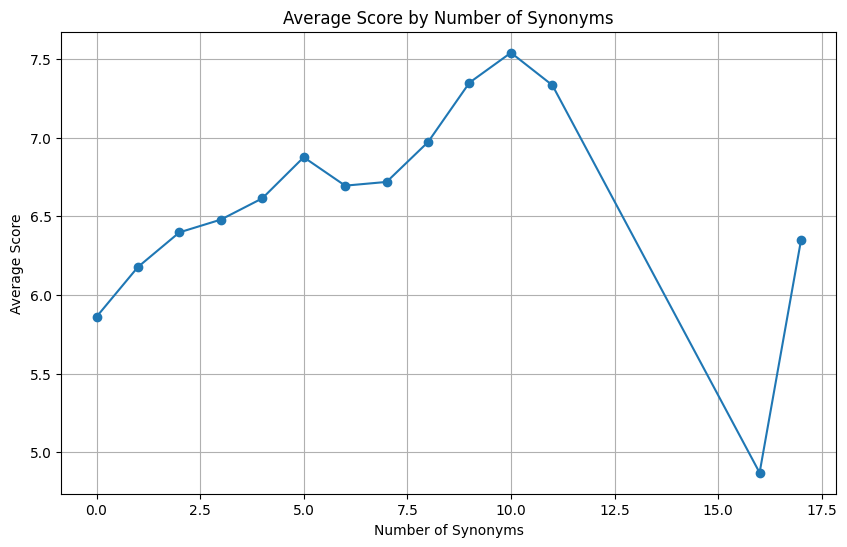

In [105]:
import matplotlib.pyplot as plt

# Calculate average score for each group
avg_scores = synonyms_df.groupby('nr_synonyms')['score'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(avg_scores.index, avg_scores.values, marker='o', linestyle='-')
plt.xlabel('Number of Synonyms')
plt.ylabel('Average Score')
plt.title('Average Score by Number of Synonyms')
plt.grid(True)
plt.show()

With this graph we see a pretty clear indication that it has an effect on the rating! The more the better, until you have too many it seems, or they are outliers.

In [106]:
def_refined_synonyms = pd.concat([df_refined_licenser, synonyms_df['nr_synonyms']], axis=1)
def_refined_synonyms.drop(['title_synonyms'], axis=1, inplace=True)
def_refined_synonyms

,anime_id,title,type,source,episodes,duration,rating,score,producer,studio,genre,opening_theme,ending_theme,release_season,is_licensed,nr_synonyms
0,11013,Inu x Boku SS,TV,Manga,12,24 min. per ep.,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Winter,True,1
1,2104,Seto no Hanayome,TV,Manga,26,24 min. per ep.,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",Spring,True,1
2,5262,Shugo Chara!! Doki,TV,Manga,51,24 min. per ep.,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Fall,True,2
3,721,Princess Tutu,TV,Original,38,16 min. per ep.,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",Summer,True,0
4,12365,Bakuman. 3rd Season,TV,Manga,25,24 min. per ep.,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Fall,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,8 min. per ep.,G - All Ages,5.50,NaN,NaN,Kids,[],[],Fall,False,0
14474,21525,Geba Geba Shou Time!,OVA,Unknown,1,25 min.,G - All Ages,4.60,Studio Lotus,NaN,Comedy,[],[],Spring,False,0
14475,37897,Godzilla: Hoshi wo Kuu Mono,Movie,Other,1,Unknown,R - 17+ (violence & profanity),0.00,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[],Fall,False,2
14476,34193,Nippon Mukashibanashi: Sannen Netarou,OVA,Other,1,40 min.,G - All Ages,6.00,NaN,NaN,"Fantasy, Kids",[],[],NaN,False,0


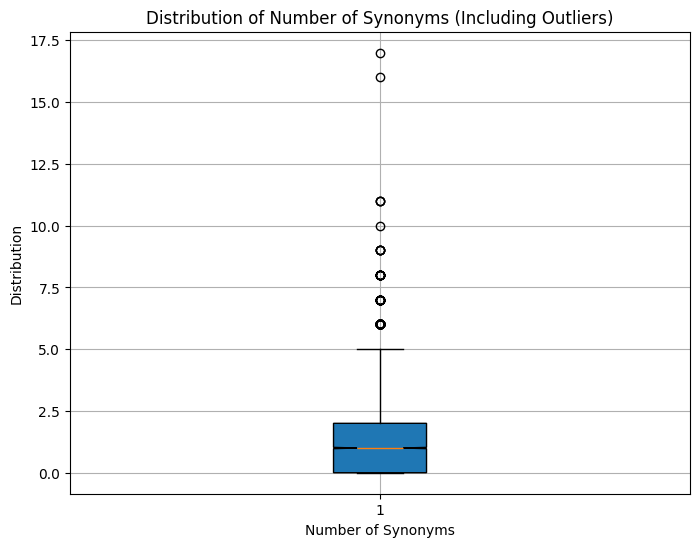

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(def_refined_synonyms['nr_synonyms'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Number of Synonyms')
plt.ylabel('Distribution')
plt.title('Distribution of Number of Synonyms (Including Outliers)')
plt.grid(True)
plt.show()

## Next lets look at producers, and if they do have a impact on their shows

                                   Average Rating
Aniplex                                  7.389420
Square Enix                              7.313375
Mainichi Broadcasting System             7.382390
Movic                                    7.239529
Inu x Boku SS Production Partners        7.630000
...                                           ...
Shodensha                                4.390000
Yumearu                                  2.670000
Gendai Production                        5.830000
Studio Cab                               5.200000
Studio Lotus                             4.600000

[1113 rows x 1 columns]


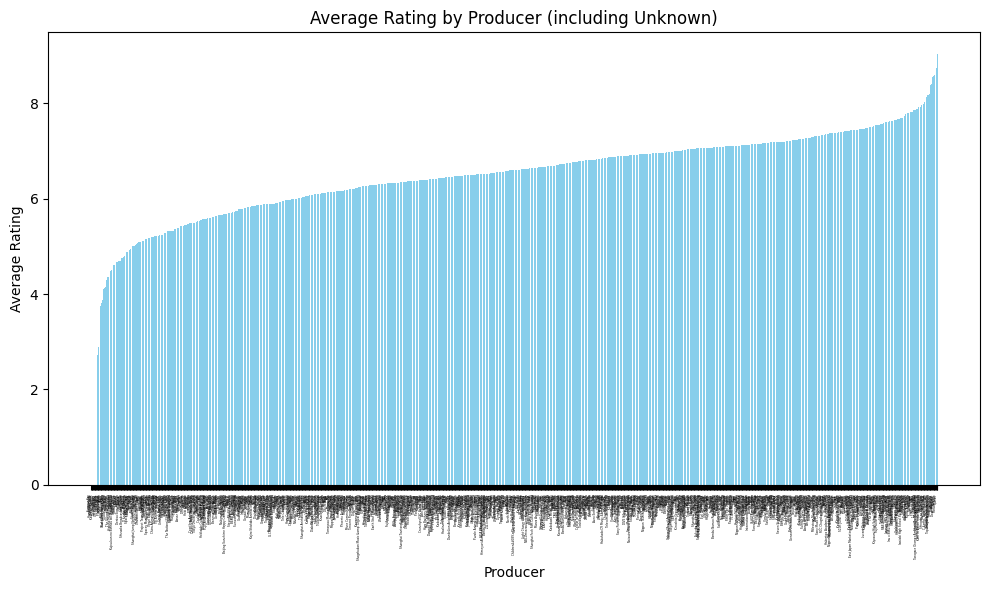

In [108]:
producers_df = def_refined_synonyms[['producer', 'score']]
producer_ratings = {}

for index, row in producers_df.iterrows():
  producer = row['producer']
  score = row['score']
  if not pd.isna(producer):
    for p in producer.split(', '):
      if p not in producer_ratings.keys():
          producer_ratings[p] = []
      producer_ratings[p].append(score)


for producer, scores in producer_ratings.items():
  producer_ratings[producer] = sum(scores) / len(scores)

df_ratings = pd.DataFrame.from_dict(producer_ratings, orient='index', columns=['Average Rating'])


print(df_ratings)

sorted_df = df_ratings.sort_values(by='Average Rating')

plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(sorted_df.index, sorted_df['Average Rating'], color='skyblue')
plt.xlabel('Producer')
plt.ylabel('Average Rating')
plt.title('Average Rating by Producer (including Unknown)')
plt.xticks(rotation=90, ha='right', fontsize=2)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Jep looks like it has a impact on the rating. 

When using this in the model, we might want to use the top something producers. Since it would not tell os much if the producer has only ben part of 1 - 3 anime.

# Duration, as of right now its in string form, I would like to convert it to minutes.

In [109]:
duration_df = def_refined_synonyms[['duration', 'score']]
duration_df['min_duration'] = np.nan

for index, row in duration_df.iterrows():
    duration = row['duration']
    if not pd.isna(duration):
        min_duration = duration.split('.')
        min_time = 0
        for d in min_duration:
            numeric_plit = d.split(' ')
            if numeric_plit.__len__() > 1:
                if numeric_plit[1] == 'min':
                    min_time += int(numeric_plit[0])
                if numeric_plit[1] == 'hr':
                    min_time += int(numeric_plit[0]) * 60
                if numeric_plit[1] == 'sec':
                    min_time += int(numeric_plit[0]) / 60
        if min_time > 0:
            duration_df.loc[index, 'min_duration'] = min_time

#Testing
#nan_duration_df = duration_df[(duration_df['min_duration'].isna()) & (duration_df['duration'] != 'Unknown')]
print(duration_df)
#Testing
nan_duration_df = duration_df[(duration_df['min_duration'].isna())]
nan_duration_df

C:\Users\simso\AppData\Local\Temp\ipykernel_7264\3815547979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df['min_duration'] = np.nan


              duration  score  min_duration
0      24 min. per ep.   7.63          24.0
1      24 min. per ep.   7.89          24.0
2      24 min. per ep.   7.55          24.0
3      16 min. per ep.   8.21          16.0
4      24 min. per ep.   8.67          24.0
...                ...    ...           ...
14473   8 min. per ep.   5.50           8.0
14474          25 min.   4.60          25.0
14475          Unknown   0.00           NaN
14476          40 min.   6.00          40.0
14477           3 min.   5.15           3.0

[14478 rows x 3 columns]


,duration,score,min_duration
55,Unknown,0.0,NaN
76,Unknown,0.0,NaN
109,Unknown,0.0,NaN
143,Unknown,0.0,NaN
145,Unknown,0.0,NaN
...,...,...,...
14416,Unknown,0.0,NaN
14417,Unknown,0.0,NaN
14425,Unknown,0.0,NaN
14463,Unknown,0.0,NaN


other then the data having been transformed, we can also see only a few rows out of the full set has nan values. This is good, since we might just drop them for the model, instead of trying to fill them in.

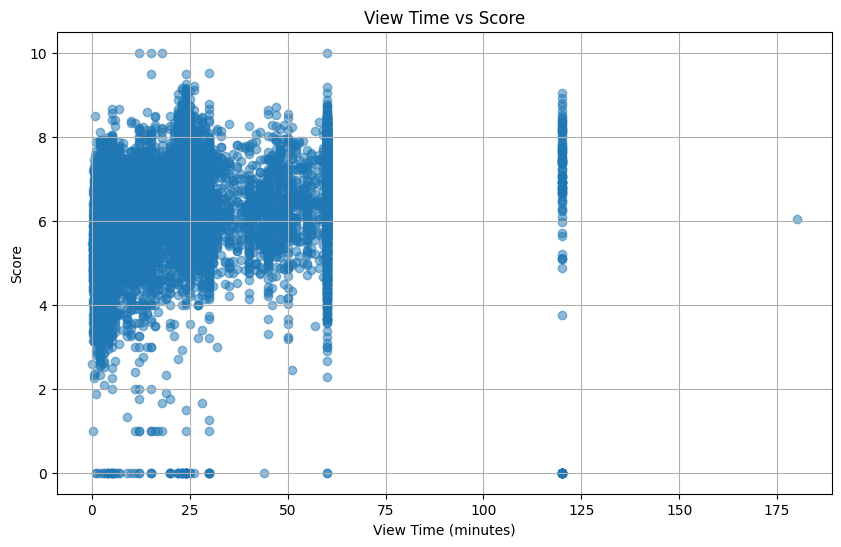

In [110]:
filtered_df = duration_df.dropna(subset=['min_duration'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['min_duration'], filtered_df['score'], alpha=0.5)
plt.title('View Time vs Score')
plt.xlabel('View Time (minutes)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Well, what we see here is alot of anime that is not even a minute long, some not even a second. This is probably a mistake in the data, or just things we just shouldnt take into account. Might be a good idea to keep in mind when we come to model building.

In [111]:
df_refined_duration = pd.concat([def_refined_synonyms, duration_df['min_duration']], axis=1)
df_refined_duration.drop(['duration'], axis=1, inplace=True)
df_refined_duration

,anime_id,title,type,source,episodes,rating,score,producer,studio,genre,opening_theme,ending_theme,release_season,is_licensed,nr_synonyms,min_duration
0,11013,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Winter,True,1,24.0
1,2104,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",Spring,True,1,24.0
2,5262,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Fall,True,2,24.0
3,721,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",Summer,True,0,16.0
4,12365,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Fall,True,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,G - All Ages,5.50,NaN,NaN,Kids,[],[],Fall,False,0,8.0
14474,21525,Geba Geba Shou Time!,OVA,Unknown,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,[],[],Spring,False,0,25.0
14475,37897,Godzilla: Hoshi wo Kuu Mono,Movie,Other,1,R - 17+ (violence & profanity),0.00,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[],Fall,False,2,NaN
14476,34193,Nippon Mukashibanashi: Sannen Netarou,OVA,Other,1,G - All Ages,6.00,NaN,NaN,"Fantasy, Kids",[],[],NaN,False,0,40.0


In [112]:
df_op = df_refined_duration[['opening_theme', 'score']]
df_op['op_artists'] = np.nan
fails = 0
for index, row in df_op.iterrows():
    opening_theme = row['opening_theme']
    themes = opening_theme.split('by ')
    to_add = []
    for i in range(1, len(themes), 2):
        eps_split = themes[i].split(' (eps')
        ep_split = themes[i].split(' (ep')
        end_split = themes[i].split("'")
        other_end_split = themes[i].split('"')
        if len(eps_split) > 1:
            to_add.append(eps_split[0])    
        elif len(ep_split) > 1:
            to_add.append(ep_split[0])
        elif len(end_split) > 1:
            to_add.append(end_split[0])
        else:
            print(themes[i])
            fails += 1
    if len(to_add) > 0:
        df_op.loc[index, 'op_artists'] = ',:, '.join(to_add)
print(fails)
df_op

C:\Users\simso\AppData\Local\Temp\ipykernel_7264\4044097683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op['op_artists'] = np.nan


Y K Z, arranged and composed 
Love" 
Low Tension (ベビーローテンション)" 
Step" 
Love" 
STEP UP↑↑↑↑" 
Tears" 
little 
supercell; performed 
March" 
Love" 
Chisa Yokoyama, English version performed 
Robbi Finkel, with featured lyrics written 
Universe Day" 

Step" 
Kokkuri-san (CV: Daisuke Ono). Narration 
EGOIST; produced 
supercell; performed 
ni Rock&#039;n&#039;Roll&#039; 
Ver.)" 
21


,opening_theme,score,op_artists
0,"['""Nirvana"" by MUCC']",7.63,MUCC
1,"['""Romantic summer"" by SUN&LUNAR']",7.89,SUN&LUNAR
2,"['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...",7.55,"Shugo Chara Egg,:, Guardians 4"
3,"['""Morning Grace"" by Ritsuko Okazaki']",8.21,Ritsuko Okazaki
4,"['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...",8.67,nano.RIPE
...,...,...,...
14473,[],5.50,NaN
14474,[],4.60,NaN
14475,[],0.00,NaN
14476,[],6.00,NaN


Not gonna take the last failed intro account, they are few and probably not that important.

In [113]:
df_refined_op = pd.concat([df_refined_duration, df_op['op_artists']], axis=1)
df_refined_op.drop(['opening_theme'], axis=1, inplace=True)
df_refined_op

,anime_id,title,type,source,episodes,rating,score,producer,studio,genre,ending_theme,release_season,is_licensed,nr_synonyms,min_duration,op_artists
0,11013,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Winter,True,1,24.0,MUCC
1,2104,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",Spring,True,1,24.0,SUN&LUNAR
2,5262,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4"
3,721,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",Summer,True,0,16.0,Ritsuko Okazaki
4,12365,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Fall,True,1,24.0,nano.RIPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,G - All Ages,5.50,NaN,NaN,Kids,[],Fall,False,0,8.0,NaN
14474,21525,Geba Geba Shou Time!,OVA,Unknown,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,[],Spring,False,0,25.0,NaN
14475,37897,Godzilla: Hoshi wo Kuu Mono,Movie,Other,1,R - 17+ (violence & profanity),0.00,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],Fall,False,2,NaN,NaN
14476,34193,Nippon Mukashibanashi: Sannen Netarou,OVA,Other,1,G - All Ages,6.00,NaN,NaN,"Fantasy, Kids",[],NaN,False,0,40.0,NaN


Doing the same for ending theme

In [114]:
df_ed = df_refined_duration[['ending_theme', 'score']]
df_ed['ed_artists'] = np.nan
fails = 0
for index, row in df_ed.iterrows():
    opening_theme = row['ending_theme']
    themes = opening_theme.split('by ')
    to_add = []
    for i in range(1, len(themes), 2):
        eps_split = themes[i].split(' (eps')
        ep_split = themes[i].split(' (ep')
        end_split = themes[i].split("'")
        other_end_split = themes[i].split('"')
        if len(eps_split) > 1:
            to_add.append(eps_split[0])    
        elif len(ep_split) > 1:
            to_add.append(ep_split[0])
        elif len(end_split) > 1:
            to_add.append(end_split[0])
        else:
            print(themes[i])
            fails += 1
    if len(to_add) > 0:
        df_ed.loc[index, 'ed_artists'] = ',:, '.join(to_add)
print(fails)
df_ed

It&#039;s You" 
little 
Romantica (ベイビーロマンチカ)" 
me" 
VOICE 
EGOIST; produced 
VOICE 
VOICE 
VOICE 
Tamio Okuda (全力少年 produced 
little 
(エウレカベイビー)" 


C:\Users\simso\AppData\Local\Temp\ipykernel_7264\3811472609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['ed_artists'] = np.nan


Step" 

U!!" 
 
Sweet Berry Love" 
Ba
Bird!!: Gakuen Logic (ベィビィバード！～ガクエンロジック～)" 
DAY" 
EGOIST; produced 
your side)" 
(ララバイ)" 
Hayato Matsuo, performed 
Hayato Matsuo, performed 
(夢色ララバイ)" 
Ai Orikasa and Yumi Takada; English version performed 
Lulla
~Yasashiku Dakasete~)" 
Agetai (ララバイ☆あ・げ・た・い)" 
Ba
Step!" 
VOICE 
(君に贈るララバイ)" 

Ai Orikasa, English version performed 
Lonely Day" 
day" 
Me" 
Step" 
me" 
Mai Nakahara with narration 
(㌧㌦ベイビー)" 
Kokkuri-san (CV: Daisuke Ono). Narration 
(ドレミファ・ララバイ)" 
EGOIST; produced 
2B PENCILS & Kanon Nakagawa (2B PENCILS & 中川かのん); Vocal 
supercell; performed 
Step!" 
(ろっかばいまいべいびい)" 
supercell; performed 
Steps (ベイビーステップ)" 
Step" 
(勇者たちのララバイ)" 
Hayato Matsuo, performed 

56


,ending_theme,score,ed_artists
0,"['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",7.63,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K..."
1,"['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",7.89,"Asuka Hinoi (1-13, 26)"
2,"['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",7.55,"Buono!,:, Buono!"
3,"['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",8.21,Ritsuko Okazaki
4,"['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",8.67,"Sphere,:, nano.RIPE"
...,...,...,...
14473,[],5.50,NaN
14474,[],4.60,NaN
14475,[],0.00,NaN
14476,[],6.00,NaN


In [116]:
Finished = pd.concat([df_refined_op, df_ed['ed_artists']], axis=1)
Finished.drop(['ending_theme'], axis=1, inplace=True)
Finished

,anime_id,title,type,source,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,op_artists,ed_artists
0,11013,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,MUCC,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K..."
1,2104,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,SUN&LUNAR,"Asuka Hinoi (1-13, 26)"
2,5262,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4","Buono!,:, Buono!"
3,721,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,Ritsuko Okazaki,Ritsuko Okazaki
4,12365,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,nano.RIPE,"Sphere,:, nano.RIPE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,G - All Ages,5.50,NaN,NaN,Kids,Fall,False,0,8.0,NaN,NaN
14474,21525,Geba Geba Shou Time!,OVA,Unknown,1,G - All Ages,4.60,Studio Lotus,NaN,Comedy,Spring,False,0,25.0,NaN,NaN
14475,37897,Godzilla: Hoshi wo Kuu Mono,Movie,Other,1,R - 17+ (violence & profanity),0.00,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",Fall,False,2,NaN,NaN,NaN
14476,34193,Nippon Mukashibanashi: Sannen Netarou,OVA,Other,1,G - All Ages,6.00,NaN,NaN,"Fantasy, Kids",NaN,False,0,40.0,NaN,NaN


In [118]:
nan_percentage = (Finished.isna().mean() * 100).round(2)

# Print the percentage of NaN values in each column
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
anime_id           0.00
title              0.00
type               0.00
source             0.00
episodes           0.00
rating             3.76
score              0.00
producer          42.75
studio            40.99
genre              0.44
release_season     9.96
is_licensed        0.00
nr_synonyms        0.00
min_duration       2.80
op_artists        67.92
ed_artists        61.25
dtype: float64


In [119]:
data_copy = Finished.copy()
data_copy = data_copy.replace('Unknown',np.nan)

nan_percentage = (data_copy.isna().mean() * 100).round(2)
print("Percentage of NaN values in each column:")
print(nan_percentage)

Percentage of NaN values in each column:
anime_id           0.00
title              0.00
type               0.21
source            29.08
episodes           0.00
rating             3.76
score              0.00
producer          42.75
studio            40.99
genre              0.44
release_season     9.96
is_licensed        0.00
nr_synonyms        0.00
min_duration       2.80
op_artists        67.94
ed_artists        61.25
dtype: float64
